In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rv = pd.read_csv(r'D:\Datasets\RestaurantVisitors.csv', index_col = 'date', parse_dates=True)

In [3]:
rv.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [4]:
rv.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [5]:
rv1 = rv

rv = rv.dropna()

In [6]:
rv.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


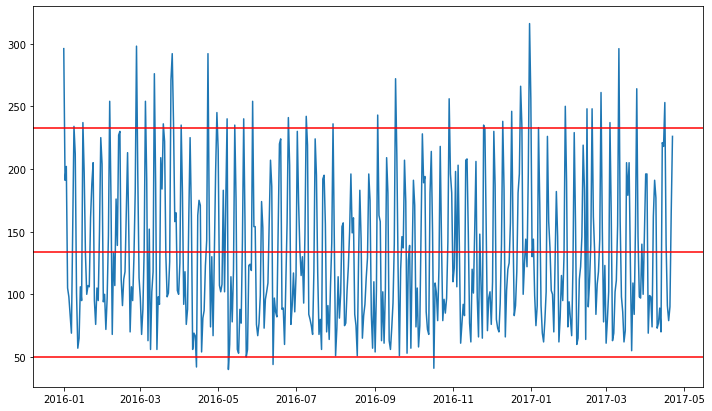

In [7]:
plt.figure(figsize=(12,7))
plt.plot(rv.total)
plt.axhline(y=rv.total.mean(), color='r')
plt.axhline(y=233, color='r')
plt.axhline(y=50, color='r')

In [8]:
rv[rv['holiday']==1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [9]:
index_pos = rv[rv['holiday']==1].index

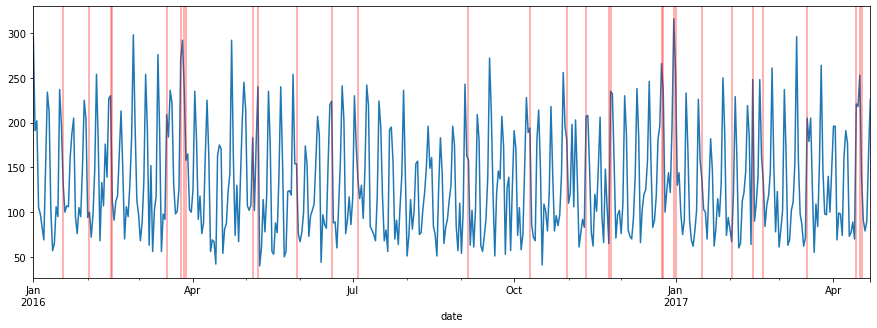

In [10]:
# ax = rv['total'].plot(figsize=(15,5))

ax = rv['total'].plot(figsize=(15,5))
for day in index_pos :
    ax.axvline(x=day, color='red', alpha = .4)

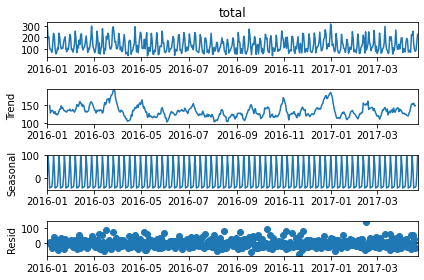

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
rv_seasonal  = seasonal_decompose(rv['total'])
rv_seasonal.plot();

In [12]:
train_rv  =rv.iloc[0:450]  # 1st 450 in train
test_rv  = rv.iloc[450 :479] # last few records in test


In [13]:
from pmdarima import  auto_arima
auto_arima(rv['total'], seasonal=True  , m =7, maxiter= 75 )

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


ARIMA(maxiter=75, order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
model1  =  SARIMAX(train_rv['total'], order = (1,0,0) ,  seasonal_order = (1,0,1,7) )
results =  model1.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [15]:
pred_rv = results.predict(start=450, end=477)
pred_rv = pred_rv.round()
pred_rv      # this prediction is without x

2017-03-26    181.0
2017-03-27     92.0
2017-03-28     96.0
2017-03-29     95.0
2017-03-30     97.0
2017-03-31    145.0
2017-04-01    232.0
2017-04-02    175.0
2017-04-03     91.0
2017-04-04     96.0
2017-04-05     95.0
2017-04-06     97.0
2017-04-07    145.0
2017-04-08    232.0
2017-04-09    175.0
2017-04-10     91.0
2017-04-11     96.0
2017-04-12     95.0
2017-04-13     97.0
2017-04-14    145.0
2017-04-15    232.0
2017-04-16    175.0
2017-04-17     91.0
2017-04-18     96.0
2017-04-19     95.0
2017-04-20     97.0
2017-04-21    145.0
2017-04-22    232.0
Freq: D, Name: predicted_mean, dtype: float64

In [16]:
err_sarima = test_rv['total'] - pred_rv

In [17]:
mse_sarima = np.mean(np.square(err_sarima))
mse_sarima

883.1071428571429

In [18]:
mape_sarima = np.round(np.mean(np.abs(err_sarima*100/test_rv['total'])))
mape_sarima

16.0

In [19]:
# how has my model done for holidays

In [20]:
test_rv[test_rv.holiday==1]
# model is not working good for holidays

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-14,Friday,1,Good Friday,41.0,74.0,57.0,49.0,221.0
2017-04-16,Sunday,1,Easter,58.0,35.0,60.0,100.0,253.0
2017-04-17,Monday,1,Easter Monday,63.0,21.0,24.0,32.0,140.0


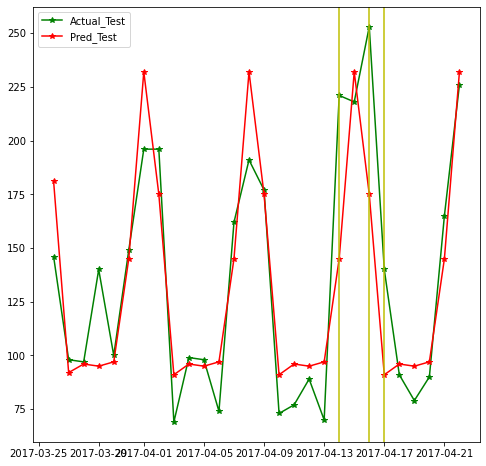

In [21]:
plt.figure(figsize= (8 , 8))
plt.plot(test_rv.total , marker ="*" , color ="g" , label ="Actual_Test")
plt.plot(pred_rv , color ="r" , marker ="*" ,label ="Pred_Test")
plt.legend()
plt.axvline(x = '2017-04-14' ,  color  = 'y')
plt.axvline(x = '2017-04-16' ,  color  = 'y')
plt.axvline(x = '2017-04-17' ,  color  = 'y')


In [22]:
rv.weekday.value_counts()

Friday       69
Saturday     69
Sunday       68
Monday       68
Tuesday      68
Wednesday    68
Thursday     68
Name: weekday, dtype: int64

In [23]:
rv.weekday = rv.weekday.replace({'Monday':1, 'Tuesday':2, 'Wednesday':3,
                                'Thursday':4, 'Friday':5, 'Saturday':6,
                                'Sunday':7})

C:\Users\harsh\AppData\Local\Temp\ipykernel_12900\2346215455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rv.weekday = rv.weekday.replace({'Monday':1, 'Tuesday':2, 'Wednesday':3,


# in above code x( exog) was not used and now building with x

In [24]:
auto_arima(rv['total'], seasonal=True, exogenous=rv[['holiday']], m =7, maxiter= 75 )

# pass exog in dataframe format 

ARIMA(maxiter=75, order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [25]:
model2 = SARIMAX(train_rv['total'], order=(0,0,1), seasonal_order=(1,0,1,7), exog=train_rv[['holiday']])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [26]:
results1 = model2.fit()

In [27]:
pred_rv_exog = results1.predict(start=450, end=477, exog=test_rv[['holiday']])
pred_rv_exog

2017-03-26    175.051528
2017-03-27     80.342536
2017-03-28     92.742114
2017-03-29     95.424259
2017-03-30     92.323981
2017-03-31    138.800992
2017-04-01    228.865574
2017-04-02    169.201409
2017-04-03     80.337931
2017-04-04     92.736799
2017-04-05     95.418790
2017-04-06     92.318690
2017-04-07    138.793037
2017-04-08    228.852456
2017-04-09    169.191711
2017-04-10     80.333326
2017-04-11     92.731483
2017-04-12     95.413321
2017-04-13     92.313399
2017-04-14    208.668631
2017-04-15    228.839340
2017-04-16    239.065563
2017-04-17    150.212271
2017-04-18     92.726169
2017-04-19     95.407853
2017-04-20     92.308108
2017-04-21    138.777128
2017-04-22    228.826224
Freq: D, Name: predicted_mean, dtype: float64

In [28]:
err_sarimax = test_rv.total - pred_rv_exog

In [29]:
mse_sarimax = np.mean(np.square(err_sarimax))
mse_sarimax

358.7839030788692

In [30]:
mape_sarimax = np.round(np.mean(np.abs(err_sarimax*100/test_rv.total)))
mape_sarimax

12.0

In [31]:
test_rv1  = test_rv


In [32]:
test_rv1['pred_rv ']  = pred_rv


C:\Users\harsh\AppData\Local\Temp\ipykernel_12900\333743715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_rv1['pred_rv ']  = pred_rv


In [33]:
test_rv1['pred_rv_exog']  = pred_rv_exog


C:\Users\harsh\AppData\Local\Temp\ipykernel_12900\1769310570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_rv1['pred_rv_exog']  = pred_rv_exog


In [34]:
test_rv1[test_rv1['holiday'] == 1 ]


,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,pred_rv,pred_rv_exog
date,,,,,,,,,,
2017-04-14,Friday,1,Good Friday,41.0,74.0,57.0,49.0,221.0,145.0,208.668631
2017-04-16,Sunday,1,Easter,58.0,35.0,60.0,100.0,253.0,175.0,239.065563
2017-04-17,Monday,1,Easter Monday,63.0,21.0,24.0,32.0,140.0,91.0,150.212271


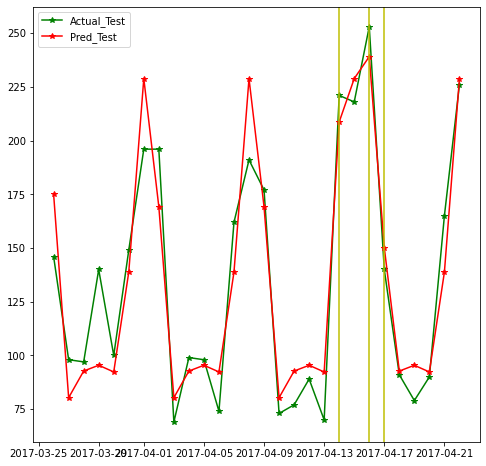

In [35]:
plt.figure(figsize= (8 , 8))
plt.plot(test_rv1.total , marker ="*" , color ="g" , label ="Actual_Test")
plt.plot(test_rv1['pred_rv_exog'] , color ="r" , marker ="*" ,label ="Pred_Test")
plt.legend()
plt.axvline(x = '2017-04-14' ,  color  = 'y')
plt.axvline(x = '2017-04-16' ,  color  = 'y')
plt.axvline(x = '2017-04-17' ,  color  = 'y')